# Feature Selection by filter methods: numerical input, categorical output

Source of data: https://archive.ics.uci.edu/ml/datasets/Air+Quality

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)

In [2]:
##  colorful prints
def black(text):
     print('\033[30m', text, '\033[0m', sep='')  
def red(text):
     print('\033[31m', text, '\033[0m', sep='')  
def green(text):
     print('\033[32m', text, '\033[0m', sep='')  
def yellow(text):
     print('\033[33m', text, '\033[0m', sep='')  
def blue(text):
     print('\033[34m', text, '\033[0m', sep='') 
def magenta(text):
     print('\033[35m', text, '\033[0m', sep='')  
def cyan(text):
     print('\033[36m', text, '\033[0m', sep='')  
def gray(text):
     print('\033[90m', text, '\033[0m', sep='')

In [3]:
df = pd.read_csv ('/home/wojciech/Pulpit/1/AirQualityUCI.csv', sep=';',nrows=1000)
green(df.shape)
df.head(3)


(1000, 17)


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360,150,"11,9",1046,166,1056,113,1692,1268,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292,112,"9,4",955,103,1174,92,1559,972,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402,88,"9,0",939,131,1140,114,1555,1074,"11,9","54,0","0,7502",NaN,NaN


### Usuwanie niepotrzebnych kolumn

In [4]:
del df['Unnamed: 15']
del df['Unnamed: 16']

### Kasuje brakujące rekordy 

In [5]:
green(df.shape)
df.isnull().sum()
df = df.dropna(how='any')
blue(df.shape)
blue(df.isnull().sum())

(1000, 15)
(1000, 15)
Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


### Kasuje duplikaty
nie było duplikatów

In [6]:
green(df.shape)
df.drop_duplicates(keep='first', inplace=True)
blue(df.shape)

(1000, 15)
(1000, 15)


### Z daty wyciągam dzień tygodnia, miesiąc, oraz godzinę jako zmienne ciągłe

In [7]:
df['Date'] = pd.to_datetime(df.Date)
df['day'] = df['Date'].dt.weekday
df['month'] = df['Date'].dt.month
df['hour'] = df['Time'].str.slice(0,2)
df[['Date','day','month','hour']].head(3)

,Date,day,month,hour
0,2004-10-03,6,10,18
1,2004-10-03,6,10,19
2,2004-10-03,6,10,20


In [8]:
del df['Date']
del df['Time']

### Kasuje zmienną -200 oznaczającą błąd danych

In [9]:
df[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH', 'day', 'month', 'hour']] = df[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH', 'day', 'month', 'hour']].replace(-200,np.NaN)

In [10]:
df.isnull().sum()


CO(GT)             0
PT08.S1(CO)       27
NMHC(GT)         274
C6H6(GT)           0
PT08.S2(NMHC)     27
NOx(GT)          206
PT08.S3(NOx)      27
NO2(GT)          206
PT08.S4(NO2)      27
PT08.S5(O3)       27
T                  0
RH                 0
AH                 0
day                0
month              0
hour               0
dtype: int64

In [11]:
del df['NMHC(GT)']
green(df.shape)
df.isnull().sum()
df = df.dropna(how='any')
blue(df.shape)
blue(df.isnull().sum())

(1000, 15)
(768, 15)
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
day              0
month            0
hour             0
dtype: int64


# Zamieniam zmienne na wartości numeryczne

In [12]:
blue(df.dtypes)

CO(GT)            object
PT08.S1(CO)      float64
C6H6(GT)          object
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                 object
RH                object
AH                object
day                int64
month              int64
hour              object
dtype: object


### Macierz korelacji

In [13]:
df['CO(GT)'] = df['CO(GT)'].str.replace(',', '.')

In [14]:
df['C6H6(GT)'] = df['C6H6(GT)'].str.replace(',', '.')

In [15]:
df['T'] = df['T'].str.replace(',', '.')

In [16]:
df['RH'] = df['RH'].str.replace(',', '.')

In [17]:
df['AH'] = df['AH'].str.replace(',', '.')

In [18]:
df[['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH', 'day', 'month', 'hour']] = df[['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH', 'day', 'month', 'hour']].astype(float)

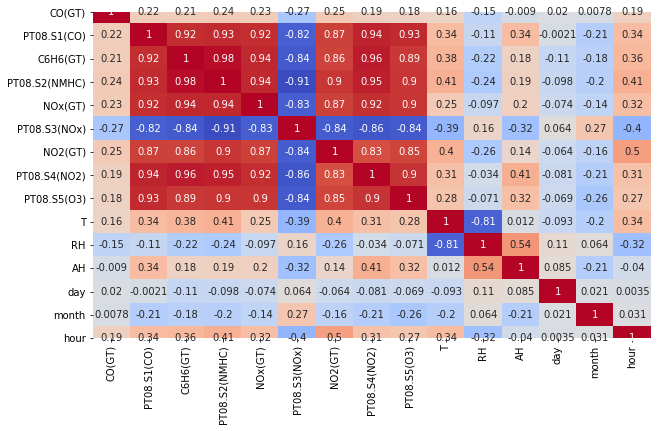

In [19]:
CORREL = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(CORREL, annot=True, cbar=False, cmap="coolwarm")

### Koduje zmienną kategoryczną wynikową - 	C6H6(GT)


max: 39.2
min: 0.5


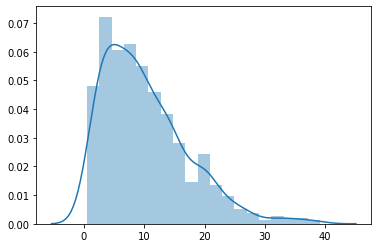

In [20]:
print('max:',df['C6H6(GT)'].max())
print('min:',df['C6H6(GT)'].min())

sns.distplot(np.array(df['C6H6(GT)']))

In [21]:
df['C6H6(GT)'] = df['C6H6(GT)'].apply(lambda x: 1 if x > 10 else 0)
df['C6H6(GT)'].value_counts()

0    446
1    322
Name: C6H6(GT), dtype: int64

In [22]:
df['C6H6(GT)'] = pd.Categorical(df['C6H6(GT)']).codes
df['C6H6(GT)'].value_counts()

0    446
1    322
Name: C6H6(GT), dtype: int64

# Model regresji liniowej bez redukcji zmiennych

In [23]:
blue(df.dtypes)

CO(GT)           float64
PT08.S1(CO)      float64
C6H6(GT)            int8
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
day              float64
month            float64
hour             float64
dtype: object


In [24]:
X = df.drop('C6H6(GT)', axis=1) 
y = df['C6H6(GT)']  

## Podział na dane treningowe i testowe

In [25]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123,stratify=y)

## Definicje

In [26]:
# Classification Assessment
def Classification_Assessment(model ,Xtrain, ytrain, Xtest, ytest, y_pred):
    import matplotlib.pyplot as plt
    from sklearn import metrics
    from sklearn.metrics import classification_report, confusion_matrix
    from sklearn.metrics import confusion_matrix, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
    from sklearn.metrics import make_scorer, precision_score, fbeta_score, f1_score, classification_report

    print("Recall Training data:     ", np.round(recall_score(ytrain, model.predict(Xtrain)), decimals=4))
    print("Precision Training data:  ", np.round(precision_score(ytrain, model.predict(Xtrain)), decimals=4))
    print("----------------------------------------------------------------------")
    print("Recall Test data:         ", np.round(recall_score(ytest, model.predict(Xtest)), decimals=4)) 
    print("Precision Test data:      ", np.round(precision_score(ytest, model.predict(Xtest)), decimals=4))
    print("----------------------------------------------------------------------")
    print("Confusion Matrix Test data")
    print(confusion_matrix(ytest, model.predict(Xtest)))
    print("----------------------------------------------------------------------")
    print(classification_report(ytest, model.predict(Xtest)))
    
    y_pred_proba = model.predict_proba(Xtest)[::,1]
    fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred)
    auc = metrics.roc_auc_score(ytest, y_pred)
    plt.plot(fpr, tpr, label='Logistic Regression (auc = %0.2f)' % auc)
    plt.xlabel('False Positive Rate',color='grey', fontsize = 13)
    plt.ylabel('True Positive Rate',color='grey', fontsize = 13)
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.legend(loc=4)
    plt.plot([0, 1], [0, 1],'r--')
    plt.show()
    print('auc',auc)

In [27]:
blue(X.shape)
green(X_train.shape)
green(X_test.shape)

(768, 14)
(614, 14)
(154, 14)


# Modelu klasyfikacji bez wyboru funkcji 

In [28]:
import numpy as np
from sklearn import model_selection
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

Parameteres = {'C': np.power(10.0, np.arange(-3, 3))}
LR = LogisticRegression(warm_start = True)
LR_Grid = GridSearchCV(LR, param_grid = Parameteres, scoring = 'roc_auc', n_jobs = -1, cv=2)

LR_Grid.fit(X_train, y_train) 
y_pred_LRC = LR_Grid.predict(X_test)

Recall Training data:      0.9728
Precision Training data:   0.9766
----------------------------------------------------------------------
Recall Test data:          0.9692
Precision Test data:       0.9844
----------------------------------------------------------------------
Confusion Matrix Test data
[[88  1]
 [ 2 63]]
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        89
           1       0.98      0.97      0.98        65

    accuracy                           0.98       154
   macro avg       0.98      0.98      0.98       154
weighted avg       0.98      0.98      0.98       154



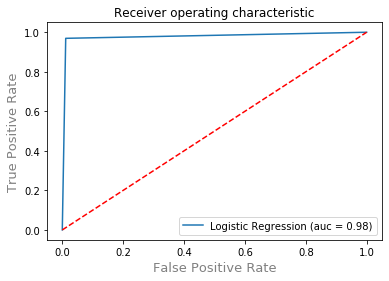

auc 0.9789974070872948


In [29]:
Classification_Assessment(LR_Grid ,X_train, y_train, X_test, y_test, y_pred_LRC)

# Redukcja zmiennych niezależnych za pomocą OLS

In [30]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

model = sm.OLS(y, sm.add_constant(X))
model_fit = model.fit()

blue(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:               C6H6(GT)   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     120.2
Date:                Sat, 28 Mar 2020   Prob (F-statistic):          4.93e-181
Time:                        09:35:48   Log-Likelihood:                -96.437
No. Observations:                 768   AIC:                             222.9
Df Residuals:                     753   BIC:                             292.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -2.0863      0.283     -7.371

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

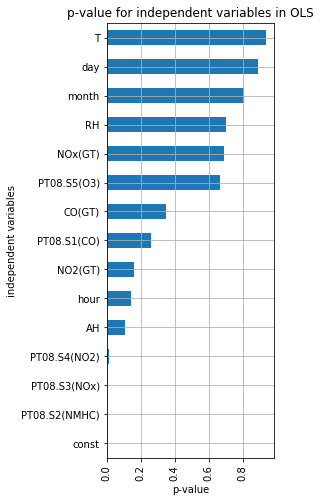

In [31]:
p_values = model_fit.summary2().tables[1]['P>|t|']
## zaokrąglam


p_values = np.round(p_values, decimals=2)
p_values= p_values.sort_values()

plt.figure(figsize=(3,8))
p_values.plot(kind='barh')
plt.title('p-value for independent variables in OLS')
plt.grid(True)
plt.ylabel('independent variables')
plt.xlabel('p-value')
plt.xticks(rotation=90)

# Wybieramy zmienne z p-value < 0.1

In [32]:
df.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH',
       'AH', 'day', 'month', 'hour'],
      dtype='object')

In [33]:
df2= df[['PT08.S4(NO2)','PT08.S3(NOx)','PT08.S2(NMHC)','AH','C6H6(GT)']]

In [34]:
y= y.to_frame()
y.head(4)

,C6H6(GT)
0,1
1,0
2,0
3,0


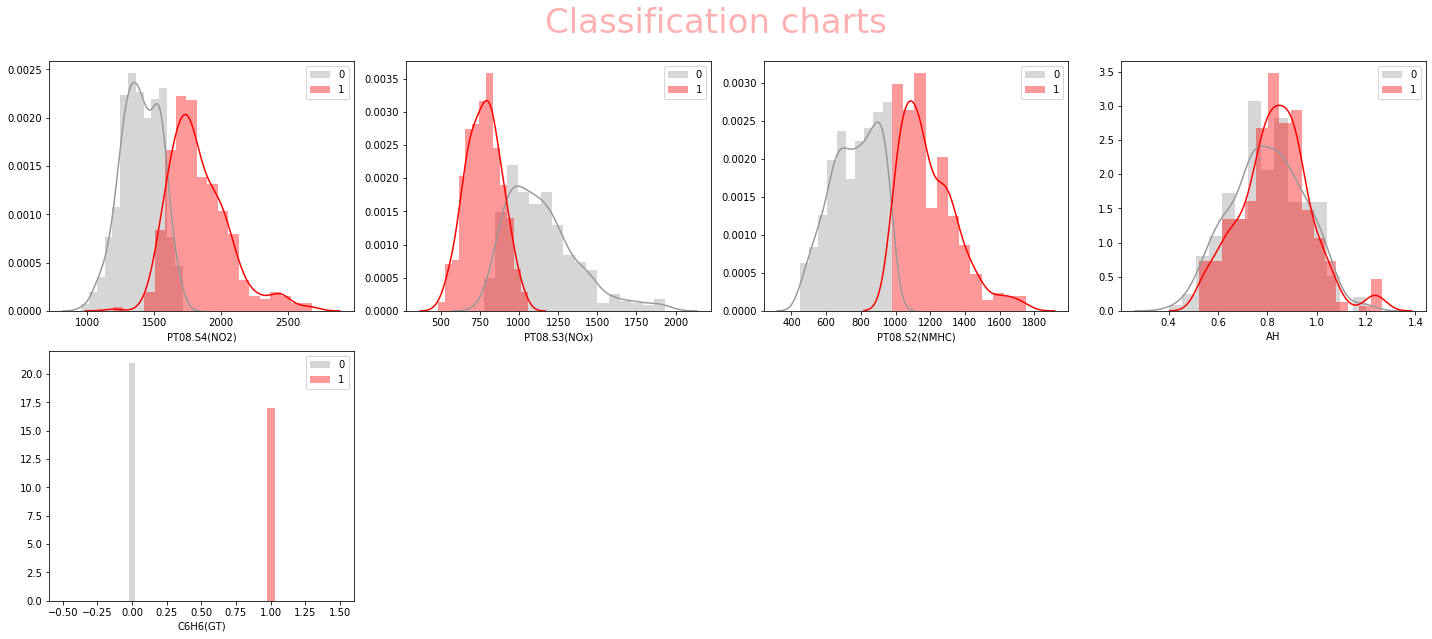

In [35]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in df2.columns:
    plt.subplot(6, 4, j+1)
    j = 1+j
    sns.distplot(df2[i][y['C6H6(GT)']==0], color='#999999', label = '0')
    sns.distplot(df2[i][y['C6H6(GT)']==1], color='#ff0000', label = '1')
    plt.legend(loc='best',fontsize=10)
fig.suptitle('Classification charts',fontsize=34,color='#ff0000',alpha=0.3)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [36]:
def scientist_plot(data, y, AAA, Title):
    fig = plt.figure(figsize = (20, 25))
    j = 0
    for i in df2.columns:
        plt.subplot(6, 4, j+1)
        j = 1+j
        sns.distplot(data[i][y[AAA]==0], color='#999999', label = '0')
        sns.distplot(data[i][y[AAA]==1], color='#274e13', label = '1')
        plt.legend(loc='best',fontsize=10)
    fig.suptitle(Title,fontsize=34,color='#274e13',alpha=0.5)
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)
    plt.show()

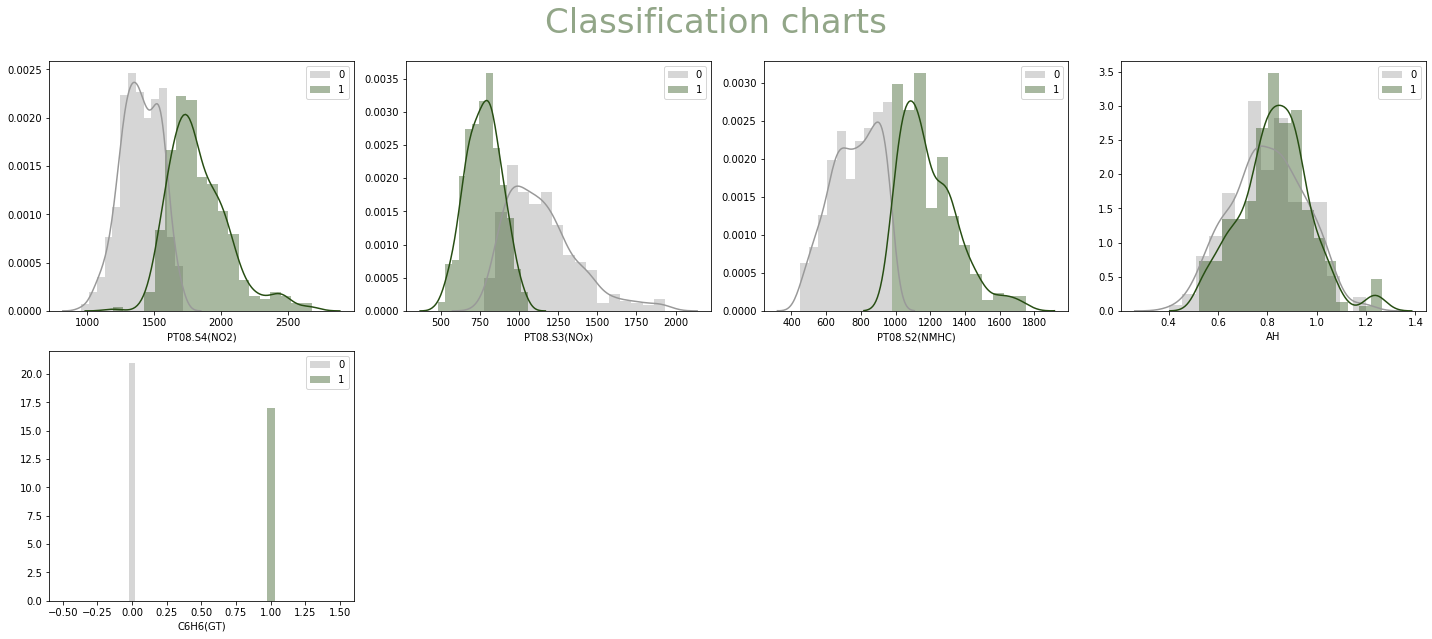

In [37]:
scientist_plot(df2, y, 'C6H6(GT)','Classification charts')

<Figure size 1440x1800 with 0 Axes>

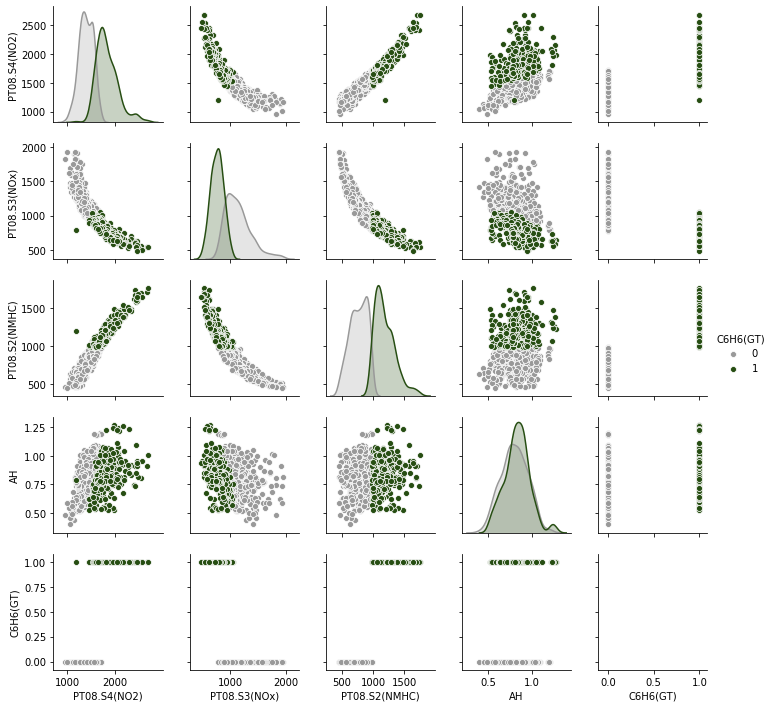

In [38]:
fig = plt.figure(figsize = (20, 25))
kot = ['#999999','#274e13']
sns.pairplot(data=df2[['PT08.S4(NO2)','PT08.S3(NOx)','PT08.S2(NMHC)','AH','C6H6(GT)']], hue='C6H6(GT)', dropna=True, height=2, palette=kot)
fig.suptitle('Classification charts',fontsize=34,color='#274e13',alpha=0.3)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()